In [82]:
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers


In [67]:
feature_columns = [ 'Sample', 'Volume of aeration tanks (m3)', 'Actual Inf rate (m3/d)', '℃ Temp.Max.SamplingDate', '℃ Temp.Avg.SamplingDate', '℃ Temp.Min.SamplingDate', '℃ Dew.Max.SamplingDate',
 '℃ Dew.Avg.SamplingDate', '℃ Dew.Min.SamplingDate', '℃ Humidity.Max.SamplingDate', '℃ Humidity.Min.SamplingDate', '℃ Wind.Max.SamplingDate', '℃ Wind.Min.SamplingDate',
 '℃ Pressure.Max.SamplingDate', '℃ Pressure.Min.SamplingDate', '℃ Precipitation.SamplingDate', '℃ Temp.Max.WeekMean', '℃ Temp.Avg.WeekMean', '℃ Temp.Min.WeekMean',
 '℃ Dew.Max.WeekMean', '℃ Dew.Avg.WeekMean', '℃ Dew.Min.WeekMean', '℃ Humidity.Max.WeekMean', '℃ Humidity.Min.WeekMean', '℃ Wind.Max.WeekMean', '℃ Wind.Min.WeekMean',
 '℃ Pressure.Max.WeekMean', '℃ Pressure.Min.WeekMean', '℃ Precipitation.WeekMean', '℃ Temp.Max.WeekMax', '℃ Temp.Avg.WeekMax', '℃ Temp.Min.WeekMax', '℃ Dew.Max.WeekMax',
 '℃ Dew.Avg.WeekMax', '℃ Dew.Min.WeekMax', '℃ Humidity.Max.WeekMax', '℃ Humidity.Min.WeekMax', '℃ Wind.Max.WeekMax', '℃ Wind.Min.WeekMax', '℃ Pressure.Max.WeekMax',
 '℃ Pressure.Min.WeekMax', '℃ Precipitation.WeekMax', '℃ Precipitation.WeekAccum', '℃ Precipitation.MonthAccum', '℃ Ambient temperature (℃)', 
'COD (mg/l) In', 'COD (mg/l) Out', 'BOD7 (mg/l) In', 'BOD7 (mg/l) Out', 'NH3 (mg/L) In', 'NH3 (mg/L) Out', 'Total Nitrogen (mg/L) In', 'Total Nitrogen (mg/L) Out',
 'Total Phosphorus (mg/L) In', 'Total Phosphorus (mg/L) Out', 'pH AS', 'DO (mg/L) AS', 'Temp (oC) AS', 'MLSS (mg/l) AS', 'MLVSS (mg/l) AS', 'SVI (ml/g) AS', 'SRT (days)', 'Precip (inch)',
 'Recycle ratio (total return sludge flow/total influent flow)', 'Calcium (mg/L)', 'Magnesium (mg/L)', 'Potassium (mg/L)', 'Iron (mg/L)', 'Manganese (mg/L)', 'Aluminium (mg/L)',
 'Zinc (mg/L)', 'Lead (mg/L)', 'Copper (mg/L)', 'Arsenic (mg/L)', 'Cadmium (mg/L)', 'Sulphur (mg/L)', 'Sillicon (mg/L)', 'Nickel (mg/L)', 'Chromium (mg/L)', 'Q* (%)',
 'COD Removal Rate (mg/L/h)', 'COD Removal Efficiency (%)', 'COD_influent_rate (g/l/h)', 'efficiency', ]

target_column = [ 'performance_class']

In [68]:
original_df = pd.read_csv("../0. Data/performance_class_data_250327.csv")
original_df = original_df.drop(columns=["Recycle ratio (total return sludge flow/total influent flow).1"])
original_df.columns.to_list()

['Sample',
 'Volume of aeration tanks (m3)',
 'Actual Inf rate (m3/d)',
 '℃ Temp.Max.SamplingDate',
 '℃ Temp.Avg.SamplingDate',
 '℃ Temp.Min.SamplingDate',
 '℃ Dew.Max.SamplingDate',
 '℃ Dew.Avg.SamplingDate',
 '℃ Dew.Min.SamplingDate',
 '℃ Humidity.Max.SamplingDate',
 '℃ Humidity.Min.SamplingDate',
 '℃ Wind.Max.SamplingDate',
 '℃ Wind.Min.SamplingDate',
 '℃ Pressure.Max.SamplingDate',
 '℃ Pressure.Min.SamplingDate',
 '℃ Precipitation.SamplingDate',
 '℃ Temp.Max.WeekMean',
 '℃ Temp.Avg.WeekMean',
 '℃ Temp.Min.WeekMean',
 '℃ Dew.Max.WeekMean',
 '℃ Dew.Avg.WeekMean',
 '℃ Dew.Min.WeekMean',
 '℃ Humidity.Max.WeekMean',
 '℃ Humidity.Min.WeekMean',
 '℃ Wind.Max.WeekMean',
 '℃ Wind.Min.WeekMean',
 '℃ Pressure.Max.WeekMean',
 '℃ Pressure.Min.WeekMean',
 '℃ Precipitation.WeekMean',
 '℃ Temp.Max.WeekMax',
 '℃ Temp.Avg.WeekMax',
 '℃ Temp.Min.WeekMax',
 '℃ Dew.Max.WeekMax',
 '℃ Dew.Avg.WeekMax',
 '℃ Dew.Min.WeekMax',
 '℃ Humidity.Max.WeekMax',
 '℃ Humidity.Min.WeekMax',
 '℃ Wind.Max.WeekMax',
 '℃ 

In [60]:
original_df = original_df[feature_columns]


In [61]:
X_svd_df = pd.read_csv("../0. Data/ESV_SVD_25D.csv", index_col=0)
X_svd_df

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,119.512586,30.206870,257.892781,244.542209,1476.170952,-886.607324,877.460751,-748.717582,-459.228337,-222.319253,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,184.855875,44.575649,394.888152,340.562363,2222.852732,-1271.239892,1316.628486,-1090.680760,-736.107534,-323.143894,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,176.093600,47.116199,391.320514,351.139450,2224.944927,-1291.757728,1319.204476,-1115.554144,-725.117653,-331.408948,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,188.055920,45.143048,405.899105,335.812563,2275.728090,-1367.835375,1378.402861,-1152.497381,-787.089174,-359.224185,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,183.131358,45.603622,414.252648,326.158036,2297.905647,-1415.437251,1424.057599,-1168.939447,-812.225139,-382.059660,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,494.238896,-38.824252,31.679222,121.701359,359.688041,-1.272138,50.041731,354.381228,781.470751,212.451309,...,-112.166328,58.385814,102.919704,72.808057,-94.706035,-13.287829,140.859177,199.582808,72.440998,-135.446180
GZ102,305.125160,42.983298,41.087944,183.634098,399.361700,15.441426,74.218017,416.102790,817.795276,118.619032,...,-79.298511,51.476070,23.173439,75.400952,-81.106475,-41.925868,50.742185,150.559234,90.515057,-98.718260
GZ103,189.396822,91.082964,48.823397,181.868279,492.019812,38.842927,82.219243,506.441452,1299.410536,137.176615,...,-100.969706,23.984718,-30.219658,158.638139,-247.486326,36.096102,117.122560,71.440781,237.915310,-110.151610
GZ104,156.687353,127.642448,46.379917,193.862037,501.665470,40.127084,70.643125,529.404743,1460.791904,158.691635,...,-103.062245,-62.725783,-0.736163,183.274059,-249.849197,1.157861,190.774279,53.071887,324.480931,-144.010866


In [62]:

original_df_indexed = original_df.set_index("Sample")

# X_svd_df와 병합
merged_df = original_df_indexed.join(X_svd_df, how="inner")

# 결과 확인
print(merged_df.shape)
merged_df


(1237, 108)


,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,℃ Humidity.Max.SamplingDate,℃ Humidity.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,3600.0,17254.0,6.67,3.33,0.56,36,32,30,93,70,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,3600.0,7007.0,5.56,3.33,0.56,34,31,27,81,65,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,3600.0,7197.0,5.56,4.44,2.78,37,35,34,87,76,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,3600.0,6126.0,11.67,10.00,8.89,46,45,45,87,76,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,3600.0,6898.0,10.56,7.78,5.56,50,45,41,94,82,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N48E,9751.2,31922.0,20.56,9.44,-1.67,49,38,28,100,28,...,151.830016,-117.714557,172.824167,-41.629593,22.907798,152.645705,-80.143302,-51.128435,230.118103,195.719729
N49E,9751.2,45538.0,0.56,-2.22,-5.56,29,26,21,100,85,...,200.399484,-88.593840,49.135515,-55.638642,158.302635,-49.911202,54.755756,87.463155,-84.435162,-31.038717
N50E,9751.2,39274.0,11.67,8.33,4.44,47,43,38,100,71,...,-52.032122,-216.553099,463.054616,-25.224855,-38.041269,246.781454,-240.494793,-390.821036,407.160221,222.794525
N51E,9751.2,34284.0,14.44,5.56,-3.33,29,24,17,92,21,...,-97.081531,-216.788836,397.440006,5.802587,-49.864763,177.831347,-152.533515,-412.436840,406.974557,212.820306


In [63]:
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')
merged_df = merged_df.fillna(merged_df.mean(numeric_only=True))

merged_df

,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,℃ Humidity.Max.SamplingDate,℃ Humidity.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,3600.0,17254.0,6.67,3.33,0.56,36,32,30,93,70,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,3600.0,7007.0,5.56,3.33,0.56,34,31,27,81,65,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,3600.0,7197.0,5.56,4.44,2.78,37,35,34,87,76,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,3600.0,6126.0,11.67,10.00,8.89,46,45,45,87,76,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,3600.0,6898.0,10.56,7.78,5.56,50,45,41,94,82,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N48E,9751.2,31922.0,20.56,9.44,-1.67,49,38,28,100,28,...,151.830016,-117.714557,172.824167,-41.629593,22.907798,152.645705,-80.143302,-51.128435,230.118103,195.719729
N49E,9751.2,45538.0,0.56,-2.22,-5.56,29,26,21,100,85,...,200.399484,-88.593840,49.135515,-55.638642,158.302635,-49.911202,54.755756,87.463155,-84.435162,-31.038717
N50E,9751.2,39274.0,11.67,8.33,4.44,47,43,38,100,71,...,-52.032122,-216.553099,463.054616,-25.224855,-38.041269,246.781454,-240.494793,-390.821036,407.160221,222.794525
N51E,9751.2,34284.0,14.44,5.56,-3.33,29,24,17,92,21,...,-97.081531,-216.788836,397.440006,5.802587,-49.864763,177.831347,-152.533515,-412.436840,406.974557,212.820306


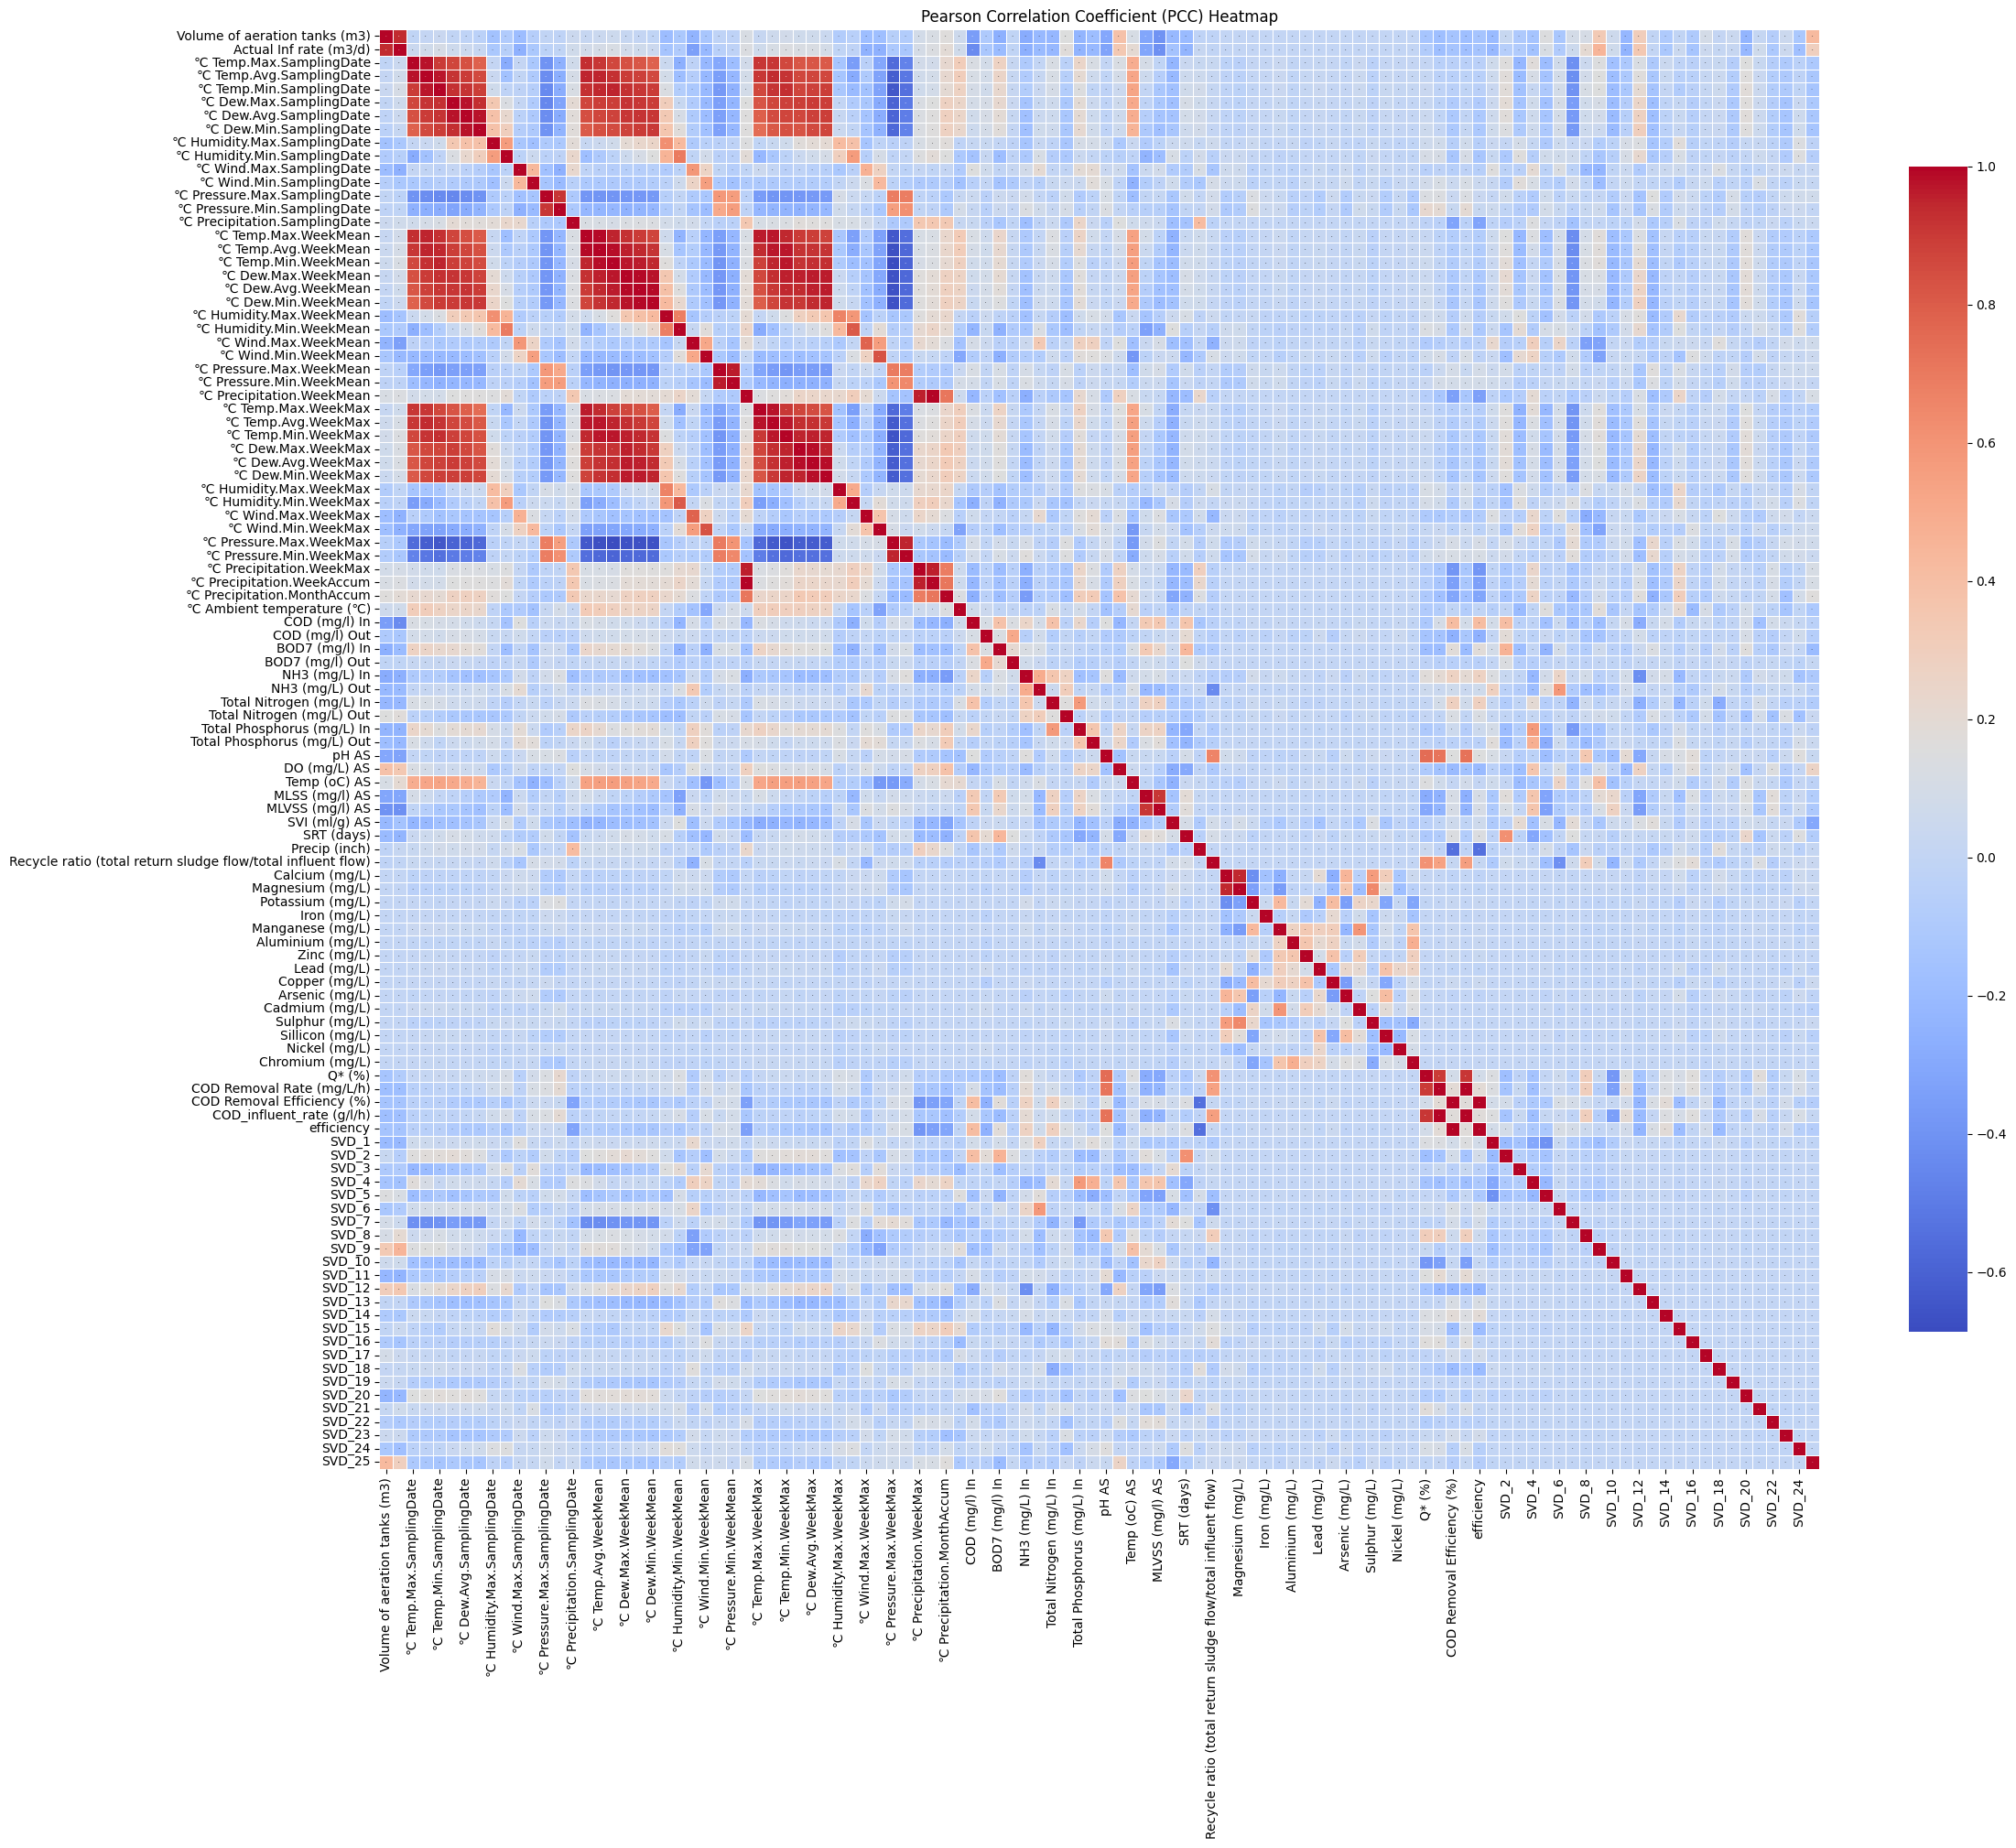

In [ ]:
# 🔹 상관계수 행렬 계산 (PCC)
corr_matrix = merged_df.corr(method='pearson')

# 🔹 히트맵 시각화
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5, annot_kws={"size": 0})
plt.title("Pearson Correlation Coefficient (PCC) Heatmap")
plt.tight_layout()
plt.show()

In [76]:
# 예측 대상 (SVD_로 시작하는 컬럼들)
target_columns = [col for col in merged_df.columns if col.startswith("SVD_")]

# 전체 피처 중에서 SVD가 아닌 컬럼들만 입력값으로 사용
feature_columns = [col for col in merged_df.columns if col not in target_columns]

X = merged_df[feature_columns]

y = merged_df[target_columns]

In [84]:
# 🔹 3. Split the data into training and test sets (70:30 split with random seed 1004)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1004)

# 🔹 4. Normalize feature values using standard scaling (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("NaNs in X_train:", np.isnan(X_train_scaled).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in X_train:", np.isinf(X_train_scaled).sum())
print("Infs in y_train:", np.isinf(y_train).sum())


NaNs in X_train: 0
NaNs in y_train: SVD_1     0
SVD_2     0
SVD_3     0
SVD_4     0
SVD_5     0
SVD_6     0
SVD_7     0
SVD_8     0
SVD_9     0
SVD_10    0
SVD_11    0
SVD_12    0
SVD_13    0
SVD_14    0
SVD_15    0
SVD_16    0
SVD_17    0
SVD_18    0
SVD_19    0
SVD_20    0
SVD_21    0
SVD_22    0
SVD_23    0
SVD_24    0
SVD_25    0
dtype: int64
Infs in X_train: 0
Infs in y_train: SVD_1     0
SVD_2     0
SVD_3     0
SVD_4     0
SVD_5     0
SVD_6     0
SVD_7     0
SVD_8     0
SVD_9     0
SVD_10    0
SVD_11    0
SVD_12    0
SVD_13    0
SVD_14    0
SVD_15    0
SVD_16    0
SVD_17    0
SVD_18    0
SVD_19    0
SVD_20    0
SVD_21    0
SVD_22    0
SVD_23    0
SVD_24    0
SVD_25    0
dtype: int64


/var/folders/c9/14_8p05x241fyxw1d_hqydvr0000gq/T/ipykernel_53422/2386043899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/c9/14_8p05x241fyxw1d_hqydvr0000gq/T/ipykernel_53422/2386043899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/c9/14_8p05x241fyxw1d_hqydvr0000gq/T/ipykernel_53422/2386043899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [85]:
# 🔹 5. Build a 3-layer deep neural network (MLP) for regression
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(25)  # Output layer without activation for regression
])

# 🔹 6. Compile the model using Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 7. Train the model with validation on the test set
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=500,
                    batch_size=32,
                    verbose=1)



Epoch 1/500


/Users/k23070952/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 845445.9375 - mae: 406.7463 - val_loss: 802499.4375 - val_mae: 403.7001
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 870627.6875 - mae: 395.8727 - val_loss: 752928.3750 - val_mae: 395.3607
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 805196.2500 - mae: 399.3880 - val_loss: 684335.3750 - val_mae: 413.7906
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 755461.8750 - mae: 416.0810 - val_loss: 654526.5625 - val_mae: 403.9743
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 688244.3750 - mae: 402.7369 - val_loss: 631586.8750 - val_mae: 406.2701
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 623952.1875 - mae: 394.3515 - val_loss: 607857.5625 - val_mae: 404.6462
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 579793.3125 - mae: 388.3606 - val_loss: 585562.6250 - val_mae: 399.7678
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 602099.8750 - mae: 397.0922 - val_

In [86]:
# 🔹 8. Prediction
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


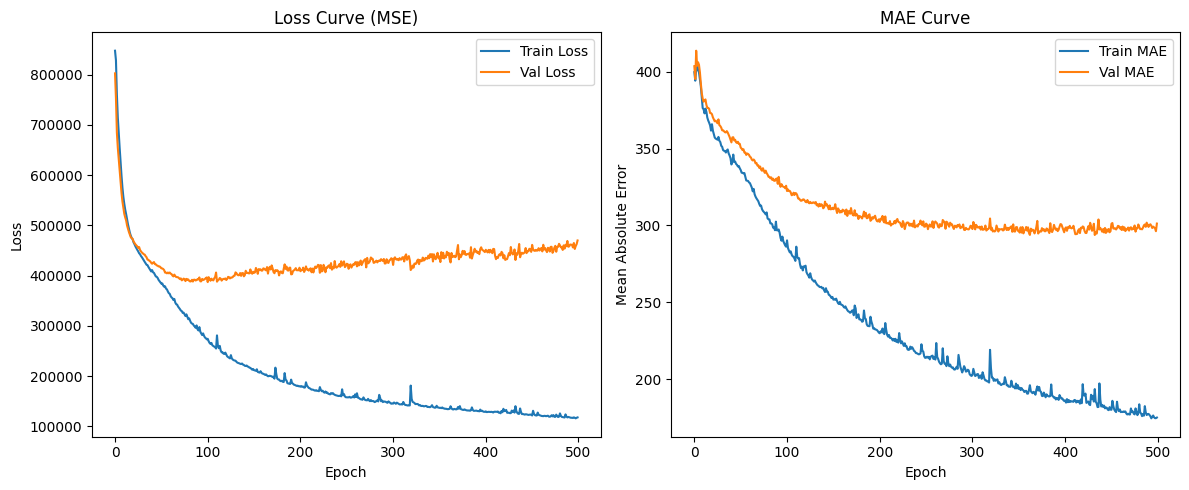

In [87]:
# 🔹 9. Plot training and validation loss/MAE over epochs
plt.figure(figsize=(12, 5))

# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()



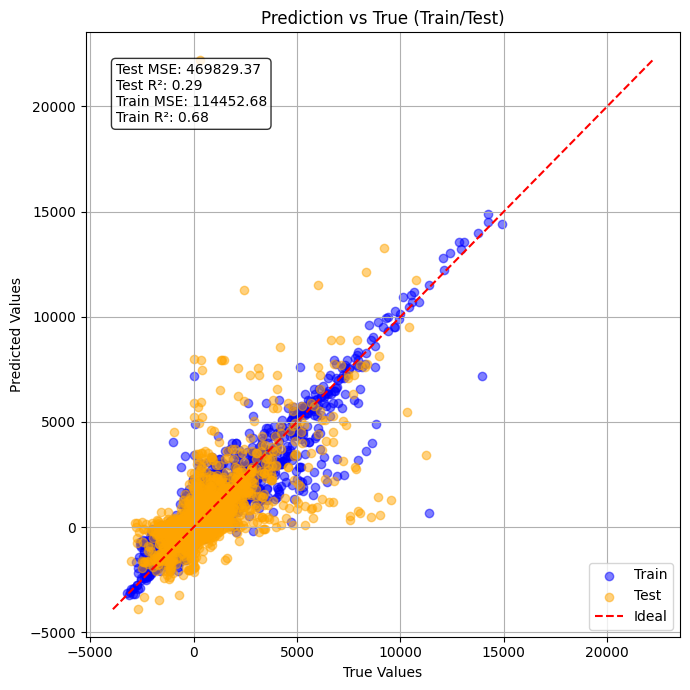

In [88]:
plt.figure(figsize=(7, 7))

# Train set (파란색)
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train', color='blue')

# Test set (주황색)
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test', color='orange')

# Diagonal (예측 = 실제)
min_val = min(y.min().values[0], y_train_pred.min(), y_test_pred.min())
max_val = max(y.max().values[0], y_train_pred.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')

# Label, title, legend
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs True (Train/Test)")
plt.legend()
plt.grid(True)

# 🔹 성능 지표 텍스트 삽입
textstr = f"""Test MSE: {mse_test:.2f}
Test R²: {r2_test:.2f}
Train MSE: {mse_train:.2f}
Train R²: {r2_train:.2f}"""
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()